## Introduction
Diagnosing heart disease is an important part of a doctor's job. This allows them to take necessary steps in order to prevent severe health degradation in the patient. This is not always possible because it is hard to have a physician to diagnose the person with heart disease all the time. This notebook is an analysis of a few classification algorithms that can be used to diagnose heart disease automatically. Classification algorithms can possibly be implemented in smart medical devices that can alert the patient of possible heart disease which allows them to seek help to mitigate the health risks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import pickle
import warnings
import matplotlib.style as style 
style.use("seaborn-whitegrid")
warnings.filterwarnings('ignore')

## Exploratory Data Analysis
From the description of the data we know

<ul>
<li>age - age in years</li>
<li>sex - (1 = male; 0 = female)</li>
<li>cp - chest pain type</li>
<li>trestbps - resting blood pressure (in mm Hg on admission to the hospital)</li>
<li>chol - serum cholestoral in mg/dl</li>
<li>fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li>restecg - resting electrocardiographic results</li>
<li>thalach - maximum heart rate achieved</li>
<li>exang - exercise induced angina (1 = yes; 0 = no)</li>
<li>oldpeak - ST depression induced by exercise relative to rest</li>
<li>slope - the slope of the peak exercise ST segment</li>
<li>ca - number of major vessels (0-3) colored by flourosopy</li>
<li>thal - 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
<li>target - have disease or not (1=yes, 0=no)</li>
</ul>

In [2]:
# Load the data 
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the loaded data we can see that there are 303 observations with 14 features. There are no null values as shown in the non-null count. This means we don't need to deal with non-null values in this dataset. 

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data = data.drop_duplicates()
data.shape

(302, 14)

In [5]:
# Get summary statistics 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
target = data.target.apply(lambda x: "Healthy " if x==0 else "Heart Disease")

print("Total count of each type of patient")
print(data.target.value_counts())

Total count of each type of patient
1    164
0    138
Name: target, dtype: int64


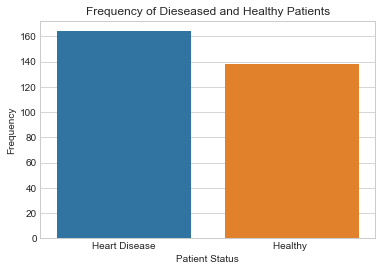

In [7]:
# Plot the Frequency
sns.countplot(target);

plt.xlabel('Patient Status')
plt.ylabel('Frequency')
plt.title('Frequency of Dieseased and Healthy Patients');

In [8]:
no_disease = len(data[data.target == 0])
disease = len(data[data.target == 1])
total = len(data)

print("Percentage of healthy patients: {:.2f}%".format(no_disease*100/total))
print("Percentage of patients with heart disease: {:.2f}%".format(disease*100/total))

Percentage of healthy patients: 45.70%
Percentage of patients with heart disease: 54.30%


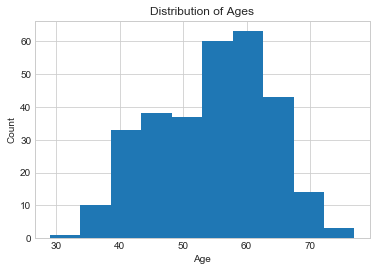

In [9]:
# See distribution of each column
plt.hist(x=data.age)
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count");

From the histogram, we can see that most of the patients in the dataset are between the ages of 55 and 60. The histogram also shows that the patient's age is approximately normally distributed.

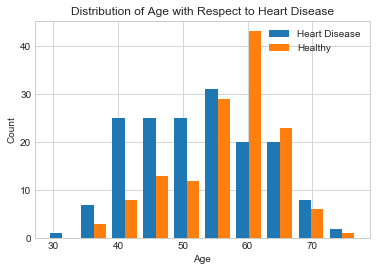

In [10]:
# Seperate the heart diseased age column
x1 = data.age[data.target == 1]

# Seperate the healthy age column
x2 = data.age[data.target == 0]

names = ["Heart Disease", "Healthy"]
plt.hist([x1, x2], bins = int(303/30), label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age with Respect to Heart Disease');

From the distribution we can see that heart disease seems to affect the age group of 50 to 60 the most. There is a sharp 

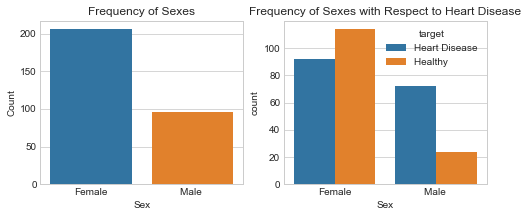

In [11]:
sexes = data.sex.apply(lambda x: "Male " if x==0 else "Female") 
target = data.target.apply(lambda x: "Healthy " if x==0 else "Heart Disease")

# Explore the distribution of sexes
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(3)
fig.set_figwidth(8)

# Pl
sns.countplot(sexes, ax=axs[0])
axs[0].set_xlabel("Sex")
axs[0].set_ylabel("Count")
axs[0].set_title("Frequency of Sexes");

sns.countplot(sexes, hue=target, ax=axs[1])
axs[1].set_xlabel("Sex")
axs[1].set_title("Frequency of Sexes with Respect to Heart Disease");


More female patients were collected and there are more healthy females compared to females with heart disease. Males in the data are primarily have heart disease. There is a possibility the model might be biased towards to males being more likely to have heart disease.

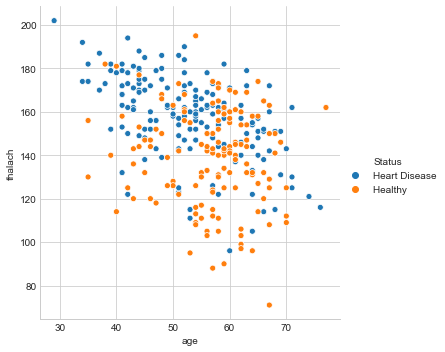

In [12]:
Status = data.target.apply(lambda x: "Healthy " if x==0 else "Heart Disease")
Status=Status.rename("Status")
sns.relplot(x="age", y="thalach",hue=Status,data=data,legend="full");

Another interesting observation is that maximum heart rate decreases as the patient is older. Although maximum heart rate is on average higher for patients with heart disease compared to patients without heart disease.

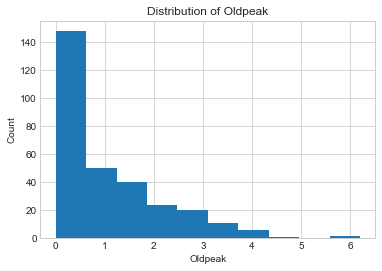

In [13]:
plt.hist(x=data.oldpeak)
plt.title("Distribution of Oldpeak")
plt.xlabel("Oldpeak")
plt.ylabel("Count");

Seems like Oldpeak is not distributed normally which might cause problems with regression classifiers. Maybe the use of Box-Cox transformation can help.

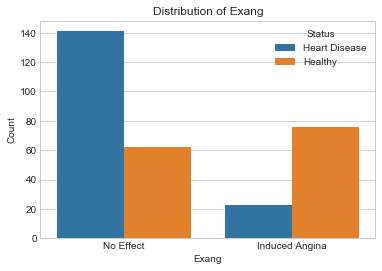

In [14]:
target = data.target.apply(lambda x: "Healthy" if x==0 else "Heart Disease")
exang = data.exang.apply(lambda x: "Induced Angina" if x==1 else "No Effect")

sns.countplot(exang,hue=target)
plt.title("Distribution of Exang")
plt.xlabel("Exang")
plt.ylabel("Count")
plt.legend(title="Status");

Patients that were subject to an induced angina from the stress exercis tended to be healthy and less likely to have heart disease.

## Feature Engineering

#### Indicator Values

In [15]:
for col in data.columns: 
    if(col != "target"):
        print("---------{}---------".format(col))
        print(data[col].unique())

---------age---------
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------sex---------
[1 0]
---------cp---------
[3 2 1 0]
---------trestbps---------
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------chol---------
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322

From reading the description and investigating the unique values, we can conclude that thal, ca, slope, exang, restecg, fbs, cp and sex are indicator features. The features thal, slope, restecg, and cp need to be transformed into dummy variables. 

In [16]:
# Get the dummies
cp = pd.get_dummies(data.cp,prefix="cp")
restecg = pd.get_dummies(data.restecg,prefix="restecg")
slope = pd.get_dummies(data.slope,prefix="slope")
ca = pd.get_dummies(data.ca,prefix="ca")
thal = pd.get_dummies(data.thal,prefix="thal")

# Get all columns except the last one
cp = cp.iloc[:,1:cp.shape[1]]
restecg = restecg.iloc[:,1:restecg.shape[1]]
slope = slope.iloc[:,1:slope.shape[1]]
ca = ca.iloc[:,1:ca.shape[1]]
thal = thal.iloc[:,1:thal.shape[1]]

# Verify that the columns were made into dummy variables
for dummy in cp,restecg,slope,ca,thal:
    print(dummy.columns)

Index(['cp_1', 'cp_2', 'cp_3'], dtype='object')
Index(['restecg_1', 'restecg_2'], dtype='object')
Index(['slope_1', 'slope_2'], dtype='object')
Index(['ca_1', 'ca_2', 'ca_3', 'ca_4'], dtype='object')
Index(['thal_1', 'thal_2', 'thal_3'], dtype='object')


In [17]:
# Seperate target value and features 
X = data.loc[:, data.columns != 'target']
y = data.target

print("Shape before removal {}".format(X.shape))

# Remove the categorical columns 
for cat in ['cp','restecg','slope','ca','thal']:
    X = X.loc[:, X.columns != cat]

# Verify 5 columns were removed
print("Shape after removal {}".format(X.shape))

Shape before removal (302, 13)
Shape after removal (302, 8)


In [18]:
# Add the dummy variable columns 
X = pd.concat([X, cp,restecg,slope,ca,thal], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   sex        302 non-null    int64  
 2   trestbps   302 non-null    int64  
 3   chol       302 non-null    int64  
 4   fbs        302 non-null    int64  
 5   thalach    302 non-null    int64  
 6   exang      302 non-null    int64  
 7   oldpeak    302 non-null    float64
 8   cp_1       302 non-null    uint8  
 9   cp_2       302 non-null    uint8  
 10  cp_3       302 non-null    uint8  
 11  restecg_1  302 non-null    uint8  
 12  restecg_2  302 non-null    uint8  
 13  slope_1    302 non-null    uint8  
 14  slope_2    302 non-null    uint8  
 15  ca_1       302 non-null    uint8  
 16  ca_2       302 non-null    uint8  
 17  ca_3       302 non-null    uint8  
 18  ca_4       302 non-null    uint8  
 19  thal_1     302 non-null    uint8  
 20  thal_2    

In [19]:
# Scale the non-categorical variables
scaled_features = data.copy()
col_names = ['oldpeak', 'thalach', 'chol','trestbps','age']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X[col_names] = features
X.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
count,3.020000e+02,302.000000,3.020000e+02,3.020000e+02,302.000000,3.020000e+02,302.000000,3.020000e+02,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-2.724090e-16,0.682119,-8.053712e-16,-2.086263e-17,0.149007,-4.087974e-16,0.327815,-1.948405e-16,0.165563,0.284768,...,0.013245,0.463576,0.466887,0.215232,0.125828,0.066225,0.013245,0.059603,0.546358,0.387417
std,1.001660e+00,0.466426,1.001660e+00,1.001660e+00,0.356686,1.001660e+00,0.470196,1.001660e+00,0.372305,0.452053,...,0.114512,0.499499,0.499730,0.411665,0.332206,0.249088,0.114512,0.237142,0.498673,0.487969
min,-2.814192e+00,0.000000,-2.144521e+00,-2.332210e+00,0.000000,-3.436149e+00,0.000000,-8.995441e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.107878e-01,0.000000,-6.617119e-01,-6.870826e-01,0.000000,-7.137164e-01,0.000000,-8.995441e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.195033e-01,1.000000,-9.140084e-02,-1.161266e-01,0.000000,1.281605e-01,0.000000,-2.096081e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.283833e-01,1.000000,4.789102e-01,5.467629e-01,0.000000,7.185677e-01,1.000000,4.803280e-01,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.499671e+00,1.000000,3.900776e+00,6.145034e+00,1.000000,2.292987e+00,1.000000,4.447460e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [20]:
# 80-20 split of train test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

print("The size of the training set is {} rows".format(X_train.shape[0]))
print("The size of the test set is {} rows".format(X_test.shape[0]))

The size of the training set is 241 rows
The size of the test set is 61 rows


In [21]:
param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'l1_ratio':np.linspace(0,1, num=10),
    'random_state': [123]
}
# instantiate the grid
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10, scoring='accuracy', return_train_score=True)
logreg = grid.fit(X_train,y_train)

In [22]:
logreg.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.0, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
def plot_confusion_matrix(X_test,y_test, estimator,name="Estimator"):
    cm = confusion_matrix(y_test, estimator.predict(X_test))
    sns.heatmap(cm,annot=True)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion matrix of {}".format(name))
    plt.show()

def plot_roc(X_test,y_test,estimator,name="Estimator"):
    probs = estimator.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic of {}'.format(name))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def display_metrics(X_test,y_test, estimator,name="Estimator"):
    print("-------------------Metrics of {} estimator-------------------\n".format(name))
    print(classification_report(y_test, estimator.predict(X_test)))
    plot_confusion_matrix(X_test,y_test, estimator,name)
    plot_roc(X_test,y_test,estimator,name)
    


-------------------Metrics of Logistic Regression with L2 Norm estimator-------------------

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        28
           1       0.87      1.00      0.93        33

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.93      0.92      0.92        61



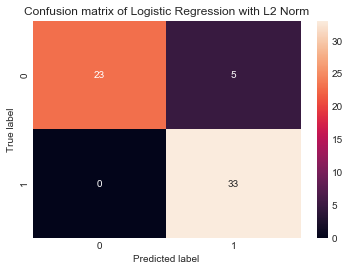

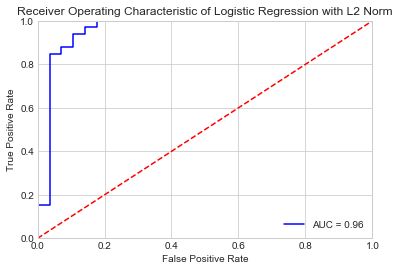

In [24]:
display_metrics(X_test,y_test, logreg.best_estimator_, "Logistic Regression with L2 Norm")

In [25]:
param_grid = {
    'C':np.append(np.linspace(0.1,1, num=10),[1]),
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto'],
    'probability':[True],
    'random_state': [123]
}
# instantiate the grid
grid = GridSearchCV(SVC(max_iter=1000), param_grid, cv=10, scoring='accuracy', return_train_score=True)
SVC_est = grid.fit(X_train,y_train)

In [26]:
SVC_est.best_estimator_

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=1000, probability=True, random_state=123, shrinking=True,
    tol=0.001, verbose=False)

-------------------Metrics of SVC estimator-------------------

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.85      1.00      0.92        33

    accuracy                           0.90        61
   macro avg       0.92      0.89      0.90        61
weighted avg       0.92      0.90      0.90        61



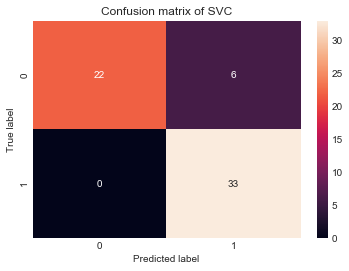

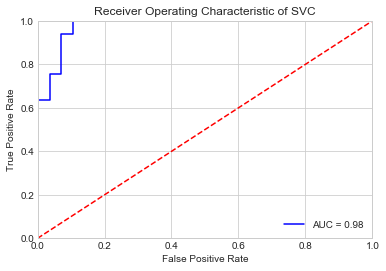

In [27]:
display_metrics(X_test,y_test, SVC_est.best_estimator_, "SVC")

In [28]:
param_grid = {
    'n_estimators':np.linspace(50,150, num=50).astype(int),
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'log2'],
    'random_state': [123]
}
# instantiate the grid
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
rf_est = grid.fit(X_train,y_train)
rf_est.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

-------------------Metrics of Random Forest estimator-------------------

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



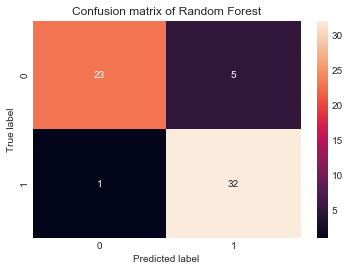

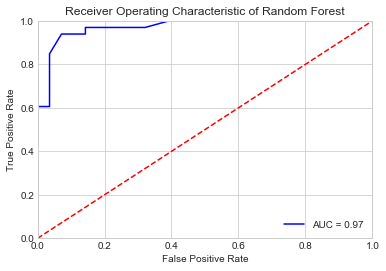

In [29]:
display_metrics(X_test,y_test,rf_est.best_estimator_,"Random Forest")

In [30]:
param_grid = {
    'base_estimator':[None, SVC(max_iter=1000), LogisticRegression(max_iter=1000)],
    'n_estimators':np.linspace(50,150, num=50).astype(int),
    'random_state': [123]
}
# instantiate the grid
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=True)
ada_est = grid.fit(X_train,y_train)
ada_est.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=1000,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=147, random_state=123)

-------------------Metrics of Ada Boost estimator-------------------

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.89      1.00      0.94        33

    accuracy                           0.93        61
   macro avg       0.95      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61



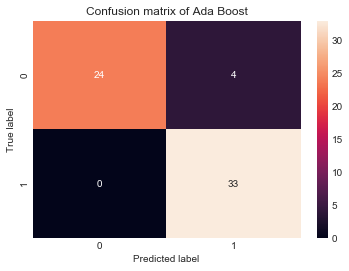

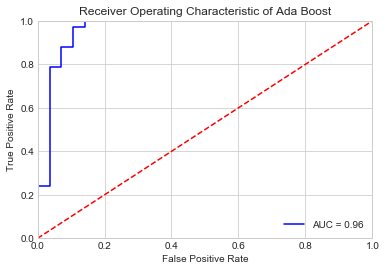

In [34]:
display_metrics(X_test,y_test,ada_est.best_estimator_,"Ada Boost")

From each of the classification reports we can see that AdaBoost performed the best with an accuracy of 93% and a true positive accuracy of 100%. In this use case having false positives aren't as bad. Having true negatives is very bad because it means there is a misdiagnosis which can lead to death. In this case 93% accuracy is not good enough for proper medical diagonosis but with a low true negative error this classifier can be used to do a preliminary check on patients. There are many ways the model can be improved. The use of more data can vastly improve the model, XGBoost and possibly deep learning can easily improve the performance of the model. The use of more powerful models will be worth the computational cost because it will decrease the classification error.

## Save the model 

In [33]:
pickle.dump(ada_est.best_estimator_, open('model.pkl','wb'))

## Reference
The dataset was provided by the UCI Machine Learning Repository with the help of:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.